<h1> Data Transformation </h1>

## Logistic Regression - on [Titanic Dataset](https://www.kaggle.com/c/titanic)

- Models the probability an object belongs to a class
- Values ranges from 0 to 1
- Can use threshold to classify into which classes a class belongs
- An S-shaped curve

$
\begin{align}
\sigma(t) = \frac{1}{1 + e^{-t}}
\end{align}
$


#### Read the data

In [1]:
import pandas as pd
df_train = pd.read_csv('../data/titanic_train.csv')

In [2]:
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## Data Statistics

#### Describing the statistics for numerical features

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Find the count of the non-NaN values per feature

In [4]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## What features can be removed?

### Remove features that are not related to your outcome

In [5]:
df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)

### Remove column with missing data

In [6]:
df_train.drop(['Cabin'], axis=1, inplace=True)

## Data Imputation - Filling in missing values
- Select a percentage threshold that you would want to accomodate
- Around 1/5th to 1/3rd of the data (20% to 33.3%)
- if more than 50% of the data is missing, you will be generating data for the majority of your dataset - Not a good thing to do

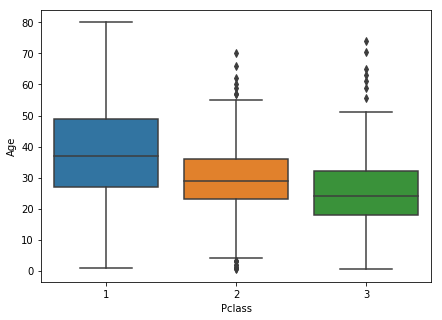

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='Pclass',y='Age',data=df_train)

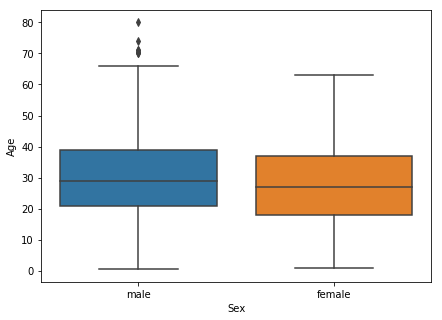

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='Sex',y='Age',data=df_train)

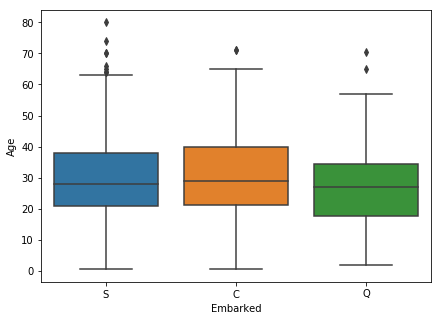

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(x='Embarked',y='Age',data=df_train)

In [12]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(df_train[df_train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [13]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(add_age,axis=1)

In [14]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

### Drop Rows

In [15]:
df_train.dropna(inplace=True)

In [16]:
df_train.count()

PassengerId    889
Survived       889
Pclass         889
Sex            889
Age            889
SibSp          889
Parch          889
Fare           889
Embarked       889
dtype: int64

## Categorical to Numerical

#### Convert the categorical values to numeric
- Find the columns that are explicitly categorical - like male, female
- Find the columns that are although numerical, represent categorical features

### One-Hot Encoding
- A technique to create multiple feature for each corrsponding value

<img src='img/one_hot_encoding.png'>

In [17]:
import numpy as np
col = 'Sex'
print(np.unique(df_train[col]))

['female' 'male']


In [18]:
import numpy as np
col = 'Embarked'
print(np.unique(df_train[col]))

['C' 'Q' 'S']


In [19]:
import numpy as np
col = 'Pclass'
print(np.unique(df_train[col]))

[1 2 3]


#### pd.get_dummies()

In [20]:
# sex = pd.get_dummies(df_train["Sex"],drop_first=True)
# embarked = pd.get_dummies(df_train["Embarked"],drop_first=True)
# pclass = pd.get_dummies(df_train["Pclass"],drop_first=True)

sex = pd.get_dummies(df_train["Sex"])
embarked = pd.get_dummies(df_train["Embarked"])
pclass = pd.get_dummies(df_train["Pclass"])

### Drop the columns that were used for transformation

In [21]:
df_train.drop(['Sex', 'Embarked', 'Pclass', 'PassengerId'], axis=1, inplace=True)

In [22]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


### Add encoded columns to the training dataset

In [23]:
df_train = pd.concat([df_train,pclass,sex,embarked],axis=1)

In [24]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


# Save the transformed file as a pickle file

In [25]:
df_train.shape

(889, 13)

In [26]:
import pickle as pkl
df_train.to_pickle('../data/titanic_tansformed.pkl')

## Logistic Regression

In [27]:
data = df_train.drop("Survived",axis=1)
label = df_train["Survived"]

In [28]:
data.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [29]:
from sklearn.cross_validation import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.3, random_state = 101)

/Users/talat/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
from sklearn.linear_model import LogisticRegression

# Run Logistic Regression
log_regr = LogisticRegression()
log_regr.fit(data_train, label_train)
predictions = log_regr.predict(data_test)

### Accuracy

In [31]:
print('Accuracy', log_regr.score(data_test, label_test))
print('Coefficients', log_regr.coef_)
print('Intercept', log_regr.intercept_)

Accuracy 0.8277153558052435
Coefficients [[-0.03855005 -0.24328718 -0.10076536  0.00231142  1.18429317  0.2997331
  -0.8678696   1.56887514 -0.95271847  0.39520621  0.20701836  0.0139321 ]]
Intercept [0.61615666]


### Precision Recall

In [32]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87       163
          1       0.85      0.68      0.76       104

avg / total       0.83      0.83      0.82       267



## Cross Validation

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# skf = StratifiedKFold(n_splits=5)

log_regr = LogisticRegression()
log_regr.fit(data_train, label_train)
score = log_regr.score(data_train, label_train)
print('Train accuracy score', score)


score_cv = cross_val_score(log_regr, data_train, label_train, cv=10, scoring='accuracy')
print('Cross Val Accuracy for each run', score_cv)
print('CrossVal Accuracy', score_cv.mean())


Train accuracy score 0.8086816720257235
Cross Val Accuracy for each run [0.76190476 0.6984127  0.79365079 0.87301587 0.80952381 0.77777778
 0.78688525 0.81967213 0.91803279 0.7704918 ]
CrossVal Accuracy 0.8009367681498828


## AUC - Receiver Operating Characteristics
- How much a model is capable of distinguishing between classes
- Higher the AUC, better the model is

$
\begin{align}
True Positive Rate = \frac{TP}{TP + FN}
\end{align}
$

<br>
$
\begin{align}
\ False Positive Rate = 1 - \frac{TN}{TN + FP} = \frac{FP}{TN + FP}
\end{align}
$

In [34]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(label_test, log_regr.predict(data_test))
roc_auc = metrics.auc(fpr, tpr)
print('AUCROC Stage1 vs Healthy: ' , roc_auc)

AUCROC Stage1 vs Healthy:  0.8014688532326569


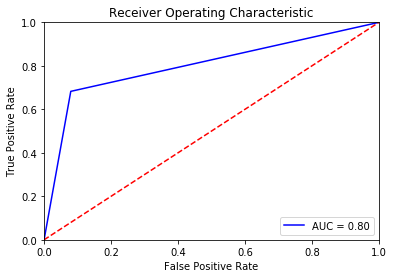

In [35]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()